<a href="https://colab.research.google.com/github/jhermosillo/diplomado_CDD2019/blob/modulo4/Notebooks/Funciones%20Discriminantes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="font-size:50px;" align="left"> <img align="left" width="350" src="../img/classification-in-machine-learning.jpg"/> <br>Modelos <br>Lineales de Clasificación</h1>

___

<style>
table, td, th {  
  border: 1px solid #ddd;
  text-align: left;
}
|  <img src="../img/data_science.jpg" width="300"/> |   <font color='midnightblue'>Diplomado en <br> Ciencia de Datos <br> con Python</font>|
|:-:|:-|


&#128214; <u>Referencias bibliográficas</u>:
* Bishop, Christopher M. (2006). Pattern recognition and machine learning. New York. Springer.
* Flach, Peter (2012). Machine Learning: The Art and Science of Algorithms that Make Sense of Data. Cambridge University Press.

## &#9991; <u> Introducción a la tarea de clasificación</u>

* Supongamos que tenemos un vector de datos de entrada $\textrm{x}$ de dimensión $D$: $\textrm{x}:=\{x_1,\ldots,x_D\}$ ($\textrm{x}\in\mathbb{R}^D$), junto con una variable objetivo correspondiente $\textrm{t}$.

&#9758; Un clasificador separa los datos de entrada en **regiones de decisión** cuyos límites llamamos **Fronteras (o superficies) de Decisión** (FD).

* Las fronteras lineales son funciones lineales del vector de entrada, por lo que están definidas en **hyperplanos** de dimensión $D-1$. 
* En la Regresión: $\textrm{t}$ es un valor real.
* En la __Clasificación__: $\textrm{t}$ es una variable que corresponde a una clase $\mathcal{C}_k$, con $k=1,2,\ldots,K$. Típicamente, en el caso de $K=2$, $t\in\{0,1\}$, de tal forma que $t=0$ corresponde a $\mathcal{C}_1$ y $t=1$ corresponde a $\mathcal{C}_2$. La representación binaria permite tener una interpretación probabilística de la pertenencia a una clase u a otra (regresión logística).
* En el caso multiclase, $t$ puede ser un vector de representación de tipo **codificación one-hot** o **codificación 1-en-**$K$. Por ejemplo, si $K=5$, la clase $\mathcal{C}_2$ se representaría así:
$$
t=(0,1,0,0,0)^\textrm{T}
$$

### &#9758; La clasificación desde la perspectiva Bayesiana

* La probabilidad conjunta $p(\textrm{x}, \textrm{t})$ contiene toda la información respecto de estas variables y **describe la incertidumbre** asociada a ellas.
* Determinar $p(\textrm{x}, \textrm{t})$ de un conjunto de **datos de entrenamiento** es un ejemplo de inferencia, y en general un problema muy difícil.
* En situaciones prácticas, debemos hacer una **predicción** respecto del valor de $\textrm{t}$, o tener una idea de su valor con el fin de **tomar una decisión**. 

Desde un enfoque Bayesiano, el problema de Clasificación se puede describir de la siguiente forma:

$$
p(\mathcal{C}_k|\textrm{x}) = \frac{p(\textrm{x}|\mathcal{C}_k)p(\mathcal{C}_k)}{p(\textrm{x})}\;\;\;\;\;\;\;(12)
$$


* El problema de la decisión puede resolverse de tres maneras posibles:
<ol>
    <li> Primero resuelve el problema de inferencia de determinar las distribuciones de probabilidad condicional a las clases $p(\textrm{x}|\mathcal{C}_k)$ para cada clase $\mathcal{C}_k$ individualmente. Además, infiere las probabilidades sobre el <i>a-priori</i> de cada clase $p(\mathcal{C}_k)$. Luego, usa el teorema de Bayes (12) para encontrar los <i>a-posterioris</i> $p(\mathcal{C}_k|\textrm{x})$. Como es habitual, el denominador puede calcularse de la siguiente forma:<br>&nbsp;
        $$
        p(\textrm{x}) = \sum_k p(\textrm{x}|\mathcal{C}_k)p(\mathcal{C}_k)\;\;\;\;\;\;\;(13)
        $$     
        Habiendo encontrado las distribuciones <i>a-posteriori</i>, usa el criterio de <b>MAP</b> (<i>Máximo A Posteriori</i>) para asignar cada nuevo $\textrm{x}$ a una de las clases. Los enfoques que explícita o implícitamente modelan las distribuciones de entradas y salidas se llaman <b><i>modelos generativos</i></b>, ya que se pueden generar datos sintéticos muestreándolos. <br> &#9758; P.Ej. <i>Naïve Bayes</i></li>
    <li> Primero resuelve el problema de inferencia de las distribuciones <i>a-posteriori</i> $p(\mathcal{C}_k|\textrm{x})$, y después usa el criterio de MAP para asignar cada nuevo $\textrm{x}$ a una de las clases. Los enfoques que modelan directamente las distribuciones <i>a-posteriori</i> se llaman  <b><i>modelos discriminativos</i></b> <br> &#9758; P.Ej. <i>Regresión Logística</i></li>
    <li> Encuentra una función $h(\textrm{x})$, llamada <b><i>función discriminante</i></b>, que mapea cada entrada $\textrm{x}$ directamente a una clase. En este caso, las probabilidades no se utilizan. <br> &#9758; P.Ej. <i>SVM</i> o <i>RNA.</i></li>

___

## &#9991; <u>Notación</u>

* En el módulo anterior, vimos la Regresión Lineal clásica, expresada de la siguiente forma:
$$
y=\beta_0+\beta_1x_1+\beta_2x_2+\ldots+\beta_nx_n,
$$
* Para fines de este módulo, vamos a re-expresar este modelo de la siguiente forma:
$$
y(\textrm{x})=\textrm{w}^\textrm{T}\textrm{x}+w_{0} \;\;\;\;\;\;\;\;(1)
$$
donde usaremos la convención clásica de notación vectorial:
<table style="width:100%">
  <tr>
    <td><img align="left" width="350" src="../img/vectores.jpg"/></td>
    <td><img align="left" width="350" src="../img/vectores_dot.jpg"/></td>
  </tr>
</table>
    
En Python, lo anterior se escribe:

In [3]:
#Para Colab
# from IPython.display import Javascript, Math
# def display_Math(s):
#   display(Javascript("var sc = document.createElement('script')"))
#   display(Javascript("sc.type='text/javascript'; sc.src='https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/MathJax.js?config=TeX-AMS-MML_HTMLorMML&dummy=.js'"))
#   display(Javascript("var currentDiv = document.activeElement.parent"))
#   #display(Javascript("sc.onload = function () {console.log('loaded')};"))
#   display(Javascript("document.body.insertBefore(sc, currentDiv)"))
#   return display(Math(s))

In [2]:
import numpy as np
from IPython.display import display, Markdown, Latex

w=(np.ones(10)*2)
x=np.arange(1,11)
print('w ({0}) = {1} \n x ({2}) = {3}'.format(w.shape,w,x.shape,x))

p=np.multiply(w,x)
y1=np.sum(p)
y2=np.dot(w,x)
y3=w@x
wT=w.T
y4=wT@x


s1 = f'$y_1 = %s = \sum w^T \odot x = \sum %s %s = %.2f$'%('np.sum(np.multiply(w,x))',p,p.shape,y1) 
s2 = f'$y_2 = %s = y_3 = %s = w \cdot x = %.2f = %.2f$'%('np.dot(w,x)','w@x',y2,y3) 
s3 = f'$y_4 = %s = w^T \cdot x = %s %s \cdot %s = %.2f$'%('w.T@x',wT,wT.shape,x,y4) 

#Para Jupyter
display(Latex(s1))
display(Latex(s2))
display(Latex(s3))
#Para Colab
# display_Math(s1)
# display_Math(s2)
# display_Math(s3)

w ((10,)) = [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.] 
 x ((10,)) = [ 1  2  3  4  5  6  7  8  9 10]


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

* En el caso de la clasificación, queremos predecir etiquetas discretas de clase, o más generalmente valores de probabilidad de pertenencia a las clases en el rango $(0,1)$.
* Para esto vamos a considerar una transformación no lineal $f(\cdot)$ de $\textrm{w}$:

$$
y(\textrm{x})=f(\textrm{w}^\textrm{T}\textrm{x}+w_{0}) \;\;\;\;\;\;\;\;\;\;(2)
$$
* A $f(\cdot)$ se le conoce como **función de activación**.
* Las FD corresponden con $y(\textrm{x})=$constante, es decir $\textrm{w}^\textrm{T}\textrm{x}+w_{0}=$constante, lo que significa que las FD son funciones lineales de $\textrm{x}$, a pesar de que $f(\cdot)$ es no lineal.
* Por esta razón a la clase de modelos descritos por (2) se le conoce como _**modelos lineales generalizados**_.
* Sin embargo, a diferencia de los modelos de regresión (1), que son lineales en los parámetros, los modelos (2) no lo son debido a $f(\cdot)$.
* Los modelos lineales de clasificación también pueden aplicarse si hacemos una transformación fija de los datos primero mediante funciones base que llamaremos aquí $\phi(x)$. 

## &#9991; <u>Funciones discriminantes</u>

### Discriminantes de 2 clases

* La función discriminante más simple es la que obtenemos mediante una función lineal del vector de entrada:

$$
y(\textrm{x})=\textrm{w}^\textrm{T}\textrm{x}+w_{0} \;\;\;\;\;\;\;\;\;\;(3)
$$

* $\textrm{w}$ es el **vector de pesos**, y $w_0$ es el bias (sesgo / intercepto). 
* A $-w_0$ se le conoce como el **umbral** (_threshold_).
* Un vector de entrada $\textrm{x}$ será asignado a la clase $\mathcal{C}_{1}$ si $y(\textrm{x}) \geq 0$ y a la clase $\mathcal{C}_{2}$ de lo contrario.
* La FD correspondiente está definida por la relación $y(\textrm{x}) = 0$, que corresponde a un hyperplano de dimensión $(D-1)$ dentro del espacio $D-$dimensional de entrada.
* Para cualesquiera dos puntos $\textrm{x}_A$ y $\textrm{x}_B$, $y(\textrm{x}_A) = y(\textrm{x}_B) = 0$, por lo que $\textrm{w}^\textrm{T}(\textrm{x}_A-\textrm{x}_B)=0$ es ortogonal a cualquier vector en la FD. 
* De esta forma, $\textrm{w}$ **determina la orientación de la FD**. 
* También, si $\textrm{x}$ es un punto en la FD, $y(\textrm{x})=0$ y la distancia normal del origen a la FD está dada por:

$$
\frac{\textrm{w}^\textrm{T}\textrm{x}}{\left\lVert\textrm{w}\right\rVert}=-\frac{w_0}{\left\lVert\textrm{w}\right\rVert}
$$

<img align="center" width="350" src="../img/modelo_lineal_conceptos.jpg"/>

* En muchas ocasiones es conveniente usar una notación más compacta, por lo que escribiremos: $\tilde{\textrm{w}}=(w_0,\textrm{w})$ y $\tilde{\textrm{x}}=(1,\textrm{x})$, por lo que:

$$
y(\textrm{x})=\tilde{\textrm{w}}^\textrm{T}\tilde{\textrm{x}}
$$

* En este caso, la FD son hyperplanos que pasan por el origen del espacio $(D+1)-$dimensional expandido de la entrada.

* En Python

---W----
W= [ 6.  -1.2]
W-shape = (2,)

---X-----
X[:2]= 
     x0           x1
[[1.         0.        ]
 [1.         0.05050505]]
X-shape=(100, 2), X-ndim=2, X-size=200

---y-----


<IPython.core.display.Latex object>

[6.   5.94 5.88 5.82 5.76 5.7  5.64 5.58 5.52 5.45 5.39 5.33 5.27 5.21
 5.15 5.09 5.03 4.97 4.91 4.85 4.79 4.73 4.67 4.61 4.55 4.48 4.42 4.36
 4.3  4.24 4.18 4.12 4.06 4.   3.94 3.88 3.82 3.76 3.7  3.64 3.58 3.52
 3.45 3.39 3.33 3.27 3.21 3.15 3.09 3.03 2.97 2.91 2.85 2.79 2.73 2.67
 2.61 2.55 2.48 2.42 2.36 2.3  2.24 2.18 2.12 2.06 2.   1.94 1.88 1.82
 1.76 1.7  1.64 1.58 1.52 1.45 1.39 1.33 1.27 1.21 1.15 1.09 1.03 0.97
 0.91 0.85 0.79 0.73 0.67 0.61 0.55 0.48 0.42 0.36 0.3  0.24 0.18 0.12
 0.06 0.  ]
y-shape= (100,)

----plot y(x) = w0 + w1x = -1.2x + 6----


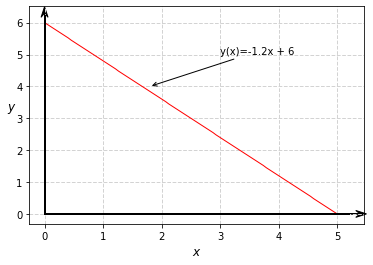

In [49]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print('---W----')
b = 6; a = -1.2
W=np.array([b,a])
print('W=',W)
print('W-shape = {}\n'.format(W.shape))

print('---X-----')
x=np.linspace(0, 5, 100)
X = np.asarray([np.ones(x.size), x]).T
print('X[:2]= ')
print('     x0           x1')
print(X[:2])
print('X-shape={0}, X-ndim={1}, X-size={2}\n'.format(X.shape,X.ndim,X.size))

print('---y-----')
y=np.round(X@W,2)

#Para Colab
# display_Math(f'$y(x) = X@W = $')

#Para Jupyter
display(Latex(f'$y(x) = X@W = $'))
print(y)
print('y-shape= {}\n'.format(y.shape))

print('----plot y(x) = w0 + w1x = -1.2x + 6----')

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(X[:,1], y, color='r',lw=1)
ax.plot((0,0),(6.2,0), color='k',lw=2)
ax.plot((0,5.2),(0,0), color='k',lw=2)

ax.grid(color='lightgray', linestyle='--', linewidth=1)
plt.xlabel('$x$',size='large')
plt.ylabel('$y$',size='large',rotation=0)
ax.annotate('y(x)=-1.2x + 6', xy=(1.8, 4), xytext=(3, 5),
            arrowprops=dict(arrowstyle = "->"))

#######################################################
# draw x and y axis
xmin=0
xmax=5.5
ymin=0
ymax=6.5

# manual arrowhead width and length
hw = 1./30.*(ymax-ymin) 
hl = 1./30.*(xmax-xmin)
lw = 1. # axis line width
ohg = 0.4 # arrow overhang

# get width and height of axes object to compute 
# matching arrowhead length and width
dps = fig.dpi_scale_trans.inverted()
bbox = ax.get_window_extent().transformed(dps)
width, height = bbox.width, bbox.height

# compute matching arrowhead length and width
yhw = hw/(ymax-ymin)*(xmax-xmin)* height/width 
yhl = hl/(xmax-xmin)*(ymax-ymin)* width/height
    
ax.arrow(0, 0, xmax-xmin, 0., fc='k', ec='k', lw = lw, 
         head_width=hw, head_length=hl, overhang = ohg, 
         length_includes_head= True, clip_on = False)
ax.arrow(0, ymin, 0., ymax-ymin, fc='k', ec='k', lw = lw, 
         head_width=yhw, head_length=yhl, overhang = ohg, 
         length_includes_head= True, clip_on = False)

<table style="width:100%">
  <tr>
    <td><img align="left" width="100%" src="../img/Python_DOT_PROD_1.jpg"/></td>
    <td><img align="left" width="100%" src="../img/Python_DOT_PROD_2.jpg"/></td>
  </tr>
</table>

------- Enfoque Xi=(x1,x2) --------------
X:=
       x1          x2
[[0.         6.        ]
 [0.05050505 5.94      ]]
X.shape= (100, 2)


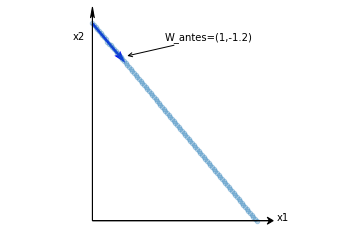

In [98]:
print('------- Enfoque Xi=(x1,x2) --------------')
X=np.array(list(zip(x,y)))
print('X:=')
print('       x1          x2')
print(X[:2])
print('X.shape=',X.shape)

#Dibuja los puntos Xi=(x1,x2)
fig = plt.figure()
ax = fig.add_subplot(111)

#-------------------------------
b = 6; a = -1.2
W_antes=np.array([b,a])

ax.quiver(0,6,1.0,-1.2, color=['b'], units='xy', scale = 1)
plt.axis('equal')

ax.scatter(X[:,0],X[:,1],marker='o',s=20,alpha=0.3)

ax.grid(color='lightgray', linestyle='--', linewidth=1)
plt.xlabel('$x$',size='large')
plt.ylabel('$y$',size='large',rotation=0)
ax.annotate('W_antes=(1,-1.2)', xy=(1, 5), xytext=(2.2, 5.5),
            arrowprops=dict(arrowstyle = "->"))

ax.annotate('x1', xy=(5.5, 0), xytext=(5.6, 0))
ax.annotate('x2', xy=(-0.5, 5.5), xytext=(-0.6, 5.5))

#######################################################
# draw x and y axis
xmin=0
xmax=5.5
ymin=0
ymax=6.5

# manual arrowhead width and length
hw = 1./30.*(ymax-ymin) 
hl = 1./30.*(xmax-xmin)
lw = 1. # axis line width
ohg = 0.4 # arrow overhang

# get width and height of axes object to compute 
# matching arrowhead length and width
dps = fig.dpi_scale_trans.inverted()
bbox = ax.get_window_extent().transformed(dps)
width, height = bbox.width, bbox.height

# compute matching arrowhead length and width
yhw = hw/(ymax-ymin)*(xmax-xmin)* height/width 
yhl = hl/(xmax-xmin)*(ymax-ymin)* width/height
    
ax.arrow(0, 0, xmax-xmin, 0., fc='k', ec='k', lw = lw, 
         head_width=hw, head_length=hl, overhang = ohg, 
         length_includes_head= True, clip_on = False)
ax.arrow(0, ymin, 0., ymax-ymin, fc='k', ec='k', lw = lw, 
         head_width=yhw, head_length=yhl, overhang = ohg, 
         length_includes_head= True, clip_on = False)
plt.axis('off')
plt.show()


In [121]:
def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
        raise Exception('lines do not intersect')

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y

------- Xi=(x0,x1,x2) --------------
X:=
       x0          x1          x2
[[1.         0.         6.        ]
 [1.         0.05050505 5.94      ]]
X.shape= (100, 3)

------- W=(w0,w1,w2) --------------
  w0   w1   w2
[-6.   1.2  1. ]


<IPython.core.display.Latex object>

d= 3.8411063979868794


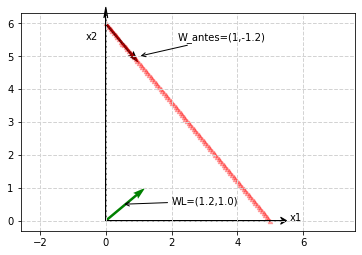

In [125]:
X=np.array(list(zip(x,y)))

print('------- Xi=(x0,x1,x2) --------------')
X=np.hstack((np.ones((X.shape[0],1)),X))
print('X:=')
print('       x0          x1          x2')
print(X[:2])
print('X.shape= {}\n'.format(X.shape))
#Dibuja los puntos Xi=(x1,x2)
fig = plt.figure()
ax = fig.add_subplot(111)

#---------W DE ANTES----------------------
b = 6; a = -1.2
W_antes=np.array([b,a])

ax.quiver(0,6,1.0,-1.2, color=['k'], units='xy', scale = 1)

plt.axis('equal')

ax.scatter(X[:,1],X[:,2],marker='^',c='r',s=20,alpha=0.3)

ax.grid(color='lightgray', linestyle='--', linewidth=1)
ax.annotate('W_antes=(1,-1.2)', xy=(1, 5), xytext=(2.2, 5.5),
            arrowprops=dict(arrowstyle = "->"))
ax.annotate('x1', xy=(5.5, 0), xytext=(5.6, 0))
ax.annotate('x2', xy=(-0.5, 5.5), xytext=(-0.6, 5.5))

#----------NUEVO W--------------------
print('------- W=(w0,w1,w2) --------------')
print('  w0   w1   w2')
W = np.array([-6,1.2,1.0])
o = [0],[0] # origin point
print(W)

#----------------------------------------------
"""
CALCULA d= -w0/||w||
"""
# usa numpy.linalg.norm(array) --> LA.norm(a)
from numpy import linalg as LA

d=0.0
#Para Colab
# display_Math(r'$d=\frac{-w_0}{\lVert w \rVert}= %.2f$'%d)

display(Latex(r'$d=\frac{-w_0}{\lVert w \rVert}= %.2f$'%d))

#Comprueba con la función line_intersection
A=(0,6)
B=(5,0)
C=(0,0)
D=(4.8,4)
xI,yI=line_intersection((A,B),(C,D))
d=np.sqrt(xI**2+yI**2)
print('d=',d)

#Dibuja las lineas (A,B) y (C,D)


#-------------------------------------------
ax.quiver(*o,W[1],W[2], color=['g'], units='xy', scale = 1)
ax.annotate('WL=(1.2,1.0)', xy=(0.5, 0.5), xytext=(2, 0.5),
            arrowprops=dict(arrowstyle = "->"))


#######################################################
# draw x and y axis
xmin=0
xmax=5.5
ymin=0
ymax=6.5

# manual arrowhead width and length
hw = 1./30.*(ymax-ymin) 
hl = 1./30.*(xmax-xmin)
lw = 1. # axis line width
ohg = 0.4 # arrow overhang

# get width and height of axes object to compute 
# matching arrowhead length and width
dps = fig.dpi_scale_trans.inverted()
bbox = ax.get_window_extent().transformed(dps)
width, height = bbox.width, bbox.height

# compute matching arrowhead length and width
yhw = hw/(ymax-ymin)*(xmax-xmin)* height/width 
yhl = hl/(xmax-xmin)*(ymax-ymin)* width/height
    
ax.arrow(0, 0, xmax-xmin, 0., fc='k', ec='k', lw = lw, 
         head_width=hw, head_length=hl, overhang = ohg, 
         length_includes_head= True, clip_on = False)
ax.arrow(0, ymin, 0., ymax-ymin, fc='k', ec='k', lw = lw, 
         head_width=yhw, head_length=yhl, overhang = ohg, 
         length_includes_head= True, clip_on = False)

plt.show()


<img align="center" width="350" src="../img/modelo_lineal_conceptos.jpg"/>

&#9998; **Calcula el valor de Y**

In [ ]:
# TU CODIGO AQUI


### Discriminantes de $K$ clases

* En el caso en que se desee implementar un clasificador mediante un modelo generativo, la sección anterior sugiere modelar los datos como distribuciones de probabilidad.
* Un supuesto importante es considerar que los datos son independientes e idénticamente distribuidos (_iid_).
* En este curso vamos a usar distribuciones paramétricas (e.g. Binomial o Gaussiana), ya que están gobernadas por un número pequeño de parámetros y se utilizan muy ampliamente en la literatura.
* EL **aprendizaje** es este caso, consiste en ajustar un modelo a los datos.
* Para ajustar los parámetros de estos modelos, vamos a seguir dos principios: el de **Máximo de Verosimilitud** (frecuentista) o el **Bayesiano** (calcular el a posteriori, partiendo de un a priori, conforme se observan datos).

### II.1 Ajuste de un modelo por Máximo de Verosimilitud (_Maximum Likelihood_) 

* Ajustar un modelo a los datos, es estimar los parámetros del modelo, una vez que se ha elegido su forma paramétrica.
* Desde un punto de vista frecuentista, se pueden estimar los parámetros mediante la maximización de la función de verosimilitud (_likelyhood_).  
* Por el teorema de Bayes, sabemos que para un conjunto de datos $D=\{x_1,\ldots,x_N\}$, la distribución de los parámetros ($\theta$) puede describirse de la siguiente forma:

$$
p(\theta|D) \propto \underbrace{p(D|\theta)}_{likelyhood}p(\theta)
$$


* Supongamos que tenemos datos uni-dimensionales, cuyo origen desconocemos... 

In [35]:
import scipy.stats as stats

def datos_misteriosos(n):
    data = stats.bernoulli.rvs(0.5, size=n[-1])
    return data

#Observaciones  
n_trials = [0, 1, 2, 3, 4, 5, 15, 50, 100, 500]
D=datos_misteriosos(n_trials)

print(D)

[0 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0 0 0 1 0
 0 0 0 0 1 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 1 1 0 1 0 0 0
 1 1 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 1
 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1
 0 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1
 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 1 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1
 0 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0
 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0
 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0
 0 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1
 0 1 0 1 0 1 0 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 1
 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 1
 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0
 0 0 1 0 0 1 1 1 0 0 0 1 

* Suponiendo una distribución Gaussiana, ajustemos este modelo a nuestros datos:  

La Gaussiana uni-dimensional:
$$
\displaystyle p(x|\mu,\sigma^2)=\mathcal{N}(x|\mu,\sigma^2)=\frac{1}{2\pi\sigma^2}\exp\left\{-\frac{1}{2\sigma^2}(x-\mu)^2\right\}\hspace{7em}(14)
$$

La Gaussiana multidimensional:
$$
\displaystyle p(\textrm{x}|\mathbf{\mu},\Sigma)=\mathcal{N}(\textrm{x}|\mathbf{\mu},\Sigma)=\frac{1}{(2\pi)^{D/2}|\Sigma|^{1/2}}\exp\left\{-\frac{1}{2}(\textrm{x}-\mu)^\textrm{T}\Sigma^{-1}(\textrm{x}-\mu)\right\}\hspace{3em}(15)
$$

* Para ello vamos a maximizar la función de verosimilitud (_likelyhood_), dadas N observaciones:

$$
\displaystyle p(\textrm{x}|\mu,\sigma^2)=\prod_{n=1}^{N}\mathcal{N}(x_n|\mu,\sigma^2)\hspace{3em}(16)
$$

* En estos casos es común calcular el $\log$ del likelyhood:

$$
\displaystyle \ln p(\textrm{x}|\mu,\sigma^2)=-\frac{1}{2\sigma^2}\sum_{n=1}^N(x_n-\mu)^2 -\frac{N}{2}\ln \sigma^2 -\frac{N}{2}\ln (2\pi)\hspace{3em}(17)
$$

&#9758; Maximizando (17) con respecto a $\mu$, obtenemos:

$$
\displaystyle \mu_{\textrm{ML}}= \frac{1}{N}\sum_{n=1}^N x_n \hspace{3em}(18)
$$

&#9758; Maximizando (17) con respecto a $\sigma^2$, obtenemos:

$$
\displaystyle \sigma^2_{\textrm{ML}}= \frac{1}{N}\sum_{n=1}^N (x_n-\mu_{\textrm{ML}})^2 \hspace{3em}(19)
$$

&#9998; **Define una función que calcule los parámetros $\mu_{\textrm{ML}}$ y $\sigma^2$ para nuestros datos $D$, <u>en función del número de observaciones</u>. Compara estos cálculos contra los que te da numpy.**

In [49]:
#Observaciones  
n_trials = [0, 1, 2, 3, 4, 5, 15, 50, 100, 500]

for n in n_trials:
    d=D[:n]
    # TU CODIGO AQUI
    

* Un problema con la estimación de los parámetros por ML es el _**overfitting**_ : la estimación "se apega" a los datos.
* Otro problema es el sesgo en la varianza.

<img src="../img/ML_varianza.jpg" width="100%">

___

### II.2 Ajuste Bayesiano de un modelo

* Como hemos dicho, el enfoque Bayesiano consiste en tener una "idea" de cuál sería la distribución a priori (modelo) de los datos para ir ajustando esa distribución conforme vamos teniendo datos nuevos, con el fin de calcular su distribución a posteriori.

* En en este contexto, si suponemos que la distribución a posteriori tiene una cierta forma funcional, se utilizan _**a prioris conjugados**_, que son modelos que permiten calcular a posterioris con esa forma funcional. 

* Por ejemplo, supongamos que elegimos una distribución de Bernoulli para nuestros "datos misteriosos".

$$
p(x|\theta)=\textrm{Bern}(x|\mu)=\mu^x(1-\mu)^{1-x}\hspace{5em}(20)
$$

Dado $N$ observaciones: $D=\{x_1,\ldots,x_N\}$, la expresión del _likelyhood_:

$$
\displaystyle p(D|\mu)=\prod_{n=1}^{N}p(x_n|\mu)=\prod_{n=1}^{N}\mu^{x_n}(1-\mu)^{1-x_{n}}\hspace{3em}(21)
$$

* Podríamos maximizar la _likelyhood_ (21) como lo hicimos arriba para la Gaussiana.
* La expresión resultante sería la misma!

$$
\displaystyle \mu_{\textrm{ML}}= \frac{1}{N}\sum_{n=1}^N x_n \hspace{3em}(22)
$$

* Si llamamos $m$ el número de observaciones de un $1$ en los datos $D$, por (22) tendríamos:

$$
\mu_{\textrm{ML}}=\frac{m}{N}\hspace{4em}(23)
$$
___

* Hagamos una estimación Bayesiana de $\mu$.
* &#9758; Tomemos $m$ como la variable observada. Necesitamos usar ahora una distribución Binomial.

$$
p(m|\mu)=\textrm{Bin}(m|N\mu)=\binom{N}{m}\mu^m(1-\mu)^{N-m}\hspace{3em}(24)
$$
donde

$$
\binom{N}{m}=\frac{N!}{(N-m)!m!}
$$
es el número de formas de elegir $m$ objetos de un total de $N$ objetos.
* &#9758; Usaremos ahora un _**a priori conjugado**_: la distribución Beta.

$$
p(\mu)=\textrm{Beta}(\mu|a,b)=\frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\mu^{a-1}(1-\mu)^{b-1}\hspace{3em}(25)
$$
donde 
$$
\Gamma(x)\equiv\int_0^\infty u^{x-1}e^{-u}\textrm{d}u
$$
* EL promedio y la varianza de la distribución Beta están dados por:

$$
\mathbb{E}[\mu]=\frac{a}{a+b}\hspace{8em}(26)
$$

$$
\textrm{var}[\mu]=\frac{ab}{(a+b)^2(a+b+1)}\hspace{3em}(27)
$$

*  &#9758; Ahora, nuestra distribución _**a posteriori**_ de $\mu$ se obtiene multiplicando el a priori Beta (25) por la _likelyhood_ Binomial (24). 
* &#9758; Trabajando sólo los factores que dependen de $\mu$, podemos ver que la expresión del _**a posteriori**_ $p(\mu|m) \propto p(m|\mu)p(\mu)$ tiene la forma:

$$
p(\mu|m,l,a,b) \propto \mu^{m+a-1}(1-\mu)^{l+b-1}\hspace{3em}(28)
$$

donde $l=N-m$ y por lo tanto corresponde al número de $0$'s en nuestro ejemplo.

* De hecho el a posteriori es una distribución Beta, y su coeficiente de normalización se puede encontrar comparando con (25):

$$
p(\mu|m,l,a,b)=\frac{\Gamma(m+a+l+b)}{\Gamma(m+a)\Gamma(l+b)}\mu^{m+a-1}(1-\mu)^{l+b-1}\hspace{3em}(29)
$$

* &#9758; Vemos que el efecto de tener un conjunto de datos con $m$ observaciones de $x=1$ y $l$ observaciones de $x=0$ ha sido incrementar los valores de $a$ por $m$ y de $b$ por $l$, yendo de la distribución a priori a la distribución a posteriori.
* &#9758; Esto nos permite dar una interpretación sencilla a los hyperparámetros $a$ y $b$ en el a priori como _**el número efectivo de observaciones de**_ $x=1$ y $x=0$ respectivamente.
* &#9758; Nota que $a$ y $b$ no necesitan ser enteros.
* &#9758; Nota también que el a posteriori, puede volver a ser el a priori, si se observan nuevos datos, repitiendo el ciclo con (29) como a priori y (24) como likelyhood. El resultado tendrá la forma de (29) nuevamente, pero con los parámetros actualizados con las nuevas observaciones efectivas de $x=1$ ($m$) y $x=0$ ($l$).

* Si el experimento es el lanzamiento de una moneda y queremos predecir el valor del siguiente lanzamiento: $p(x=1|D)$, aplicamos las reglas de la suma y del producto:

$$
p(x=1|D)=\int_0^1 p(x=1,\mu|D)\textrm{d}\mu=\int_0^1 p(x=1|\mu)p(\mu|D)\textrm{d}\mu=\int_0^1 \mu p(\mu|D)\textrm{d}\mu = \mathbb{E}[\mu|D]
$$

* Utilizando (29) como el a posteriori de $p(\mu|D)$ junto con (26) para el cálculo de la media de la distribución Beta, tenemos:

$$
p(x=1|D)=\frac{m+a}{m+a+l+b}\hspace{5em}(30)
$$

*  &#9758; Para un conjunto grande de datos $m,l\to \infty$, y el resultado (30) tiende a ser el mimso que (23)

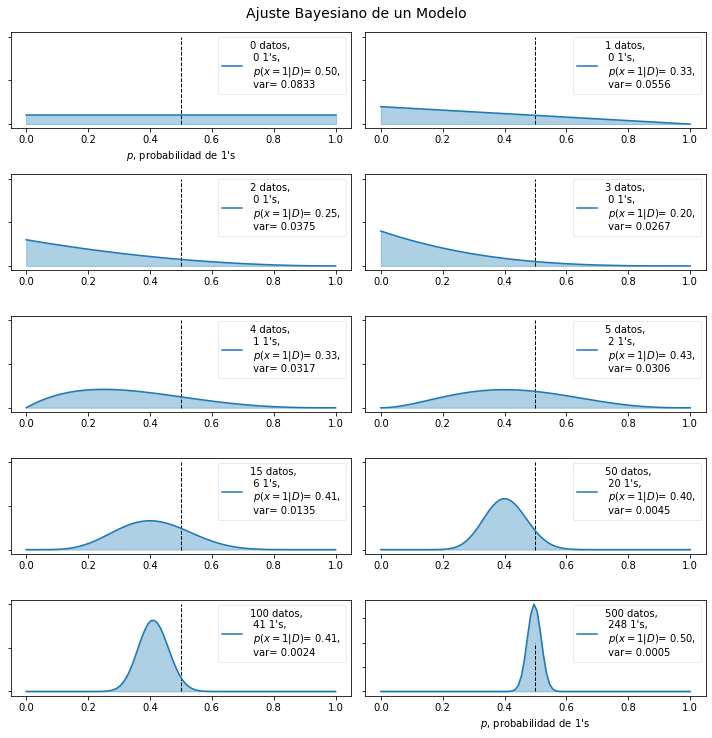

In [50]:
fig=plt.figure(figsize=(10,10))

dist = stats.beta
x = np.linspace(0, 1, 100)

for k, N in enumerate(n_trials):
    ax = plt.subplot(len(n_trials) / 2, 2, k + 1)
    plt.xlabel("$p$, probabilidad de 1's") \
        if k in [0, len(n_trials) - 1] else None
    plt.setp(ax.get_yticklabels(), visible=False)
    m = D[:N].sum()
    l=N-m
    a=1+m
    b=1+l
    mu=(a)/(a+b)
    var=a*b/((a+b)*(a+b)*(a+b+1))
    y = dist.pdf(x, a, b)
    plt.plot(x, y, label="%d datos,\n %d 1's, \n $p(x=1|D)$= %2.2f, \n var= %2.4f  " %(N, m, mu,var))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 10, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)


plt.suptitle("Ajuste Bayesiano de un Modelo",
             y=1.02,
             fontsize=14)

plt.tight_layout()

___
___

## &#9991; <u>III. Modelos Generativos de Clasificación</u>

In [125]:
import pandas as pd
pd.set_option('float_format', '{:.2f}'.format)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [115]:
df1=pd.read_csv('../Data/ujse_a_1434342_sm1547/SBAcase.csv')
df1.index=df1['Selected']
df1=df1.drop(columns=['Selected'])
df1.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,ChgOffPrinGr,GrAppv,SBA_Appv,New,RealEstate,Portion,Recession,daysterm,xx,Default
Selected,,,,,,,,,,,,,,,,,,,,,
0,1004285007,SIMPLEX OFFICE SOLUTIONS,ANAHEIM,CA,92801,CALIFORNIA BANK & TRUST,CA,532420,15074,2001,...,0,30000,15000,0,0,0.5,0,1080,16175.0,0
1,1004535010,DREAM HOME REALTY,TORRANCE,CA,90505,CALIFORNIA BANK & TRUST,CA,531210,15130,2001,...,0,30000,15000,0,0,0.5,1,1680,17658.0,0
0,1005005006,"Winset, Inc. dba Bankers Hill",SAN DIEGO,CA,92103,CALIFORNIA BANK & TRUST,CA,531210,15188,2001,...,0,30000,15000,0,0,0.5,0,1080,16298.0,0
1,1005535001,Shiva Management,SAN DIEGO,CA,92108,CALIFORNIA BANK & TRUST,CA,531312,15719,2003,...,0,50000,25000,0,0,0.5,0,1080,16816.0,0
1,1005996006,"GOLD CROWN HOME LOANS, INC",LOS ANGELES,CA,91345,SBA - EDF ENFORCEMENT ACTION,CO,531390,16840,2006,...,0,343000,343000,0,1,1.0,0,7200,24103.0,0


In [116]:
df2=df1[['Recession','New','RealEstate','DisbursementGross','Portion','Default']]
df2

,Recession,New,RealEstate,DisbursementGross,Portion,Default
Selected,,,,,,
0,0,0,0,32812,0.50,0
1,1,0,0,30000,0.50,0
0,0,0,0,30000,0.50,0
1,0,0,0,50000,0.50,0
1,0,0,1,343000,1.00,0
...,...,...,...,...,...,...
1,0,1,0,150000,0.50,0
1,0,0,1,99000,0.80,0
0,0,0,0,50000,0.80,0


,count,mean,std,min,25%,50%,75%,max
Recession,2102.00,0.07,0.25,0.00,0.00,0.00,0.00,1.00
New,2102.00,0.15,0.36,0.00,0.00,0.00,0.00,1.00
RealEstate,2102.00,0.27,0.45,0.00,0.00,0.00,1.00,1.00
DisbursementGross,2102.00,242737.21,338286.10,4835.00,40000.00,100000.00,300000.00,2315000.00
Portion,2102.00,0.67,0.19,0.30,0.50,0.50,0.85,1.00
Default,2102.00,0.33,0.47,0.00,0.00,0.00,1.00,1.00


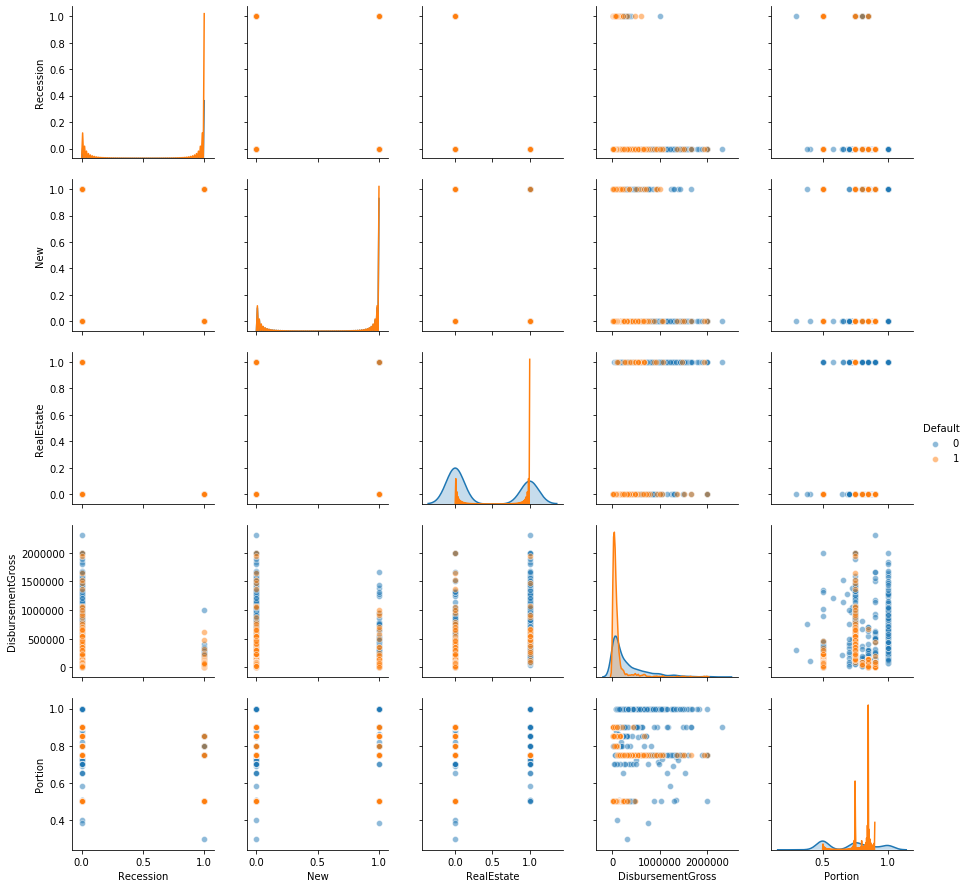

In [118]:
g=sns.pairplot(df2,kind='scatter', plot_kws={'alpha': 0.5}, vars=['Recession','New','RealEstate','DisbursementGross','Portion'],hue='Default')